## Experiment 3


In [1]:
# Importing necessary libraries and modules
import numpy as np
import IPython
import scipy
import math
import matplotlib

import pandas as pd
from scipy import signal as sp
from scipy.io import wavfile

from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams

In [2]:
%matplotlib inline
plt.style.use(['seaborn-deep'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (12,6),
    "font.size": 10})

pi = np.pi

In [3]:
#Roll number: 191EE238
alpha = 1 + 238 % 4  
print(alpha)


3


#### Plotting Signal Spectra

In [4]:
def plot_mag(x, Fs,scale, max_freq=None,Label = None):
    
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
        
    X = (np.abs(np.fft.fft(x)[0:C]))
    N = Fs * np.arange(0, C) / len(x)
    
    if (scale == 'linear'):
        None;
    elif (scale == 'log'):
        X = 20*np.log10(X)
   

    if Label:
            plt.plot(N, X,label = Label)
            plt.legend(loc = 'upper right')
    else:
        plt.plot(N, X)
        
    return N, X

In [5]:
Fs, flute3 = wavfile.read('Experiment-3/flute3.wav')
print("Sampling frequncy of flute track:", Fs)

Fs, piano3 = wavfile.read('Experiment-3/piano3.wav')
print("Sampling frequncy of piano track:", Fs)

Fs, trumpet3 = wavfile.read('Experiment-3/trumpet3.wav')
print("Sampling frequncy of trumpet track:", Fs)

Fs, violin3 = wavfile.read('Experiment-3/violin3.wav')
print("Sampling frequncy of violin track:", Fs)

Sampling frequncy of flute track: 11025
Sampling frequncy of piano track: 11025
Sampling frequncy of trumpet track: 11025
Sampling frequncy of violin track: 11025


In [6]:
def normalize(x):
    mean = np.mean(x)
    std_dev = np.std(x)
    
    return (x - mean)/std_dev

In [42]:
def fundamental_freq(x,Fs,threshold = 1e4,max_freq = None,Label = None,plot = False):
   
    C = int(len(x) / 2)
    
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    
    X = np.abs(np.fft.fft(x)[0:C])
    N = Fs * np.arange(0, C) / len(x)
    
    peak, _= scipy.signal.find_peaks(X,threshold = threshold)
    
    if (plot == True):
        plt.plot(N,X,label = Label)
        plt.plot(N[peak],X[peak],'rx')
        plt.legend()
    
    
    f_freq = N[peak[0]]
    
    return f_freq

In [95]:
def subplotting(x, Fs,scale, name = None, save = False):
    
    x_norm = normalize(x)
    
    if (scale == 'both'):
        
        plt.subplot(2,1,1)
        plt.title('Plotting {} track in frequency domain'.format(name))
        N,X =plot_mag(x, Fs,scale = 'linear',Label = '{} track in frequency domain(linear)'.format(name))
        plt.subplot(2,1,2)
        _,_ = plot_mag(x, Fs,scale = 'log', Label = '{} track in frequency domain(dB)'.format(name))
        plt.xlabel("Frequency")
        
    else:
        plt.subplot(2,1,1)
        plt.title('Plotting unnormalized and normalized {} track in frequency domain'.format(name))
        N,X = plot_mag(x, Fs,scale,Label = '{} in freq domain'.format(name))
        plt.subplot(2,1,2)
        _,_ = plot_mag(x_norm, Fs,scale, Label = 'Normalized {} track in freq domain'.format(name))
    
    if save:
        plt.savefig("Experiment-3/Results/{} track in Freq domain".format(name))
        


Fundamental frequncy of flute3 is: 793.5040268456376


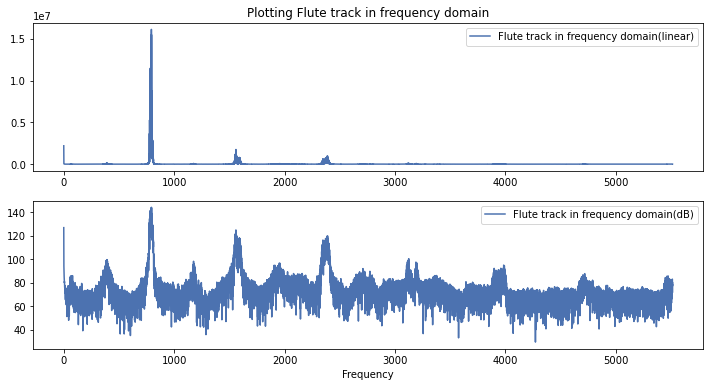

In [96]:
subplotting(flute3, Fs,scale = 'both', name = 'Flute',save = True)
print("Fundamental frequncy of flute3 is:",fundamental_freq(flute3,Fs,threshold = 5e6,Label = None,plot = False) )
IPython.display.Audio(flute3,rate = Fs)

Fundamental frequncy of piano3 is: 1048.3772727272728


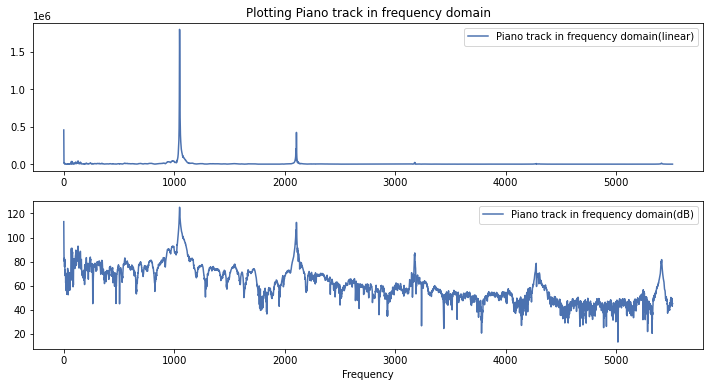

In [99]:
subplotting(piano3, Fs,scale = 'both', name = 'Piano',save = True)
print("Fundamental frequncy of piano3 is:",fundamental_freq(piano3,Fs,threshold = 1e4,Label = None,plot = False) )
IPython.display.Audio(piano3,rate = Fs)

Fundamental frequncy of trumpet3 is: 1046.940349674323


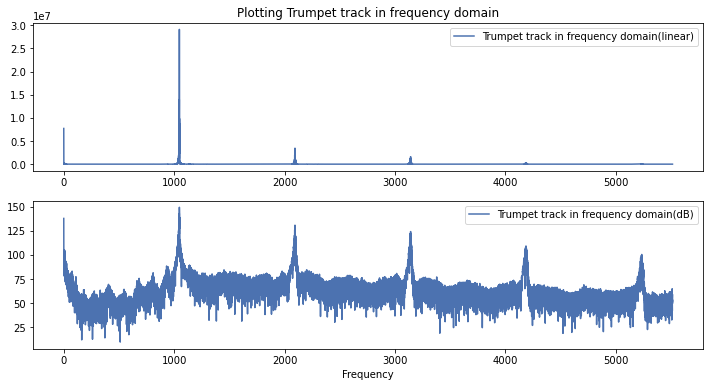

In [103]:
subplotting(trumpet3, Fs,scale = 'both', name = 'Trumpet',save = True)
print("Fundamental frequncy of trumpet3 is:",fundamental_freq(trumpet3,Fs,threshold = 1e7,Label = None,plot = False) )
IPython.display.Audio(trumpet3,rate = Fs)

Fundamental frequncy of violin3 is: 255.43636363636364


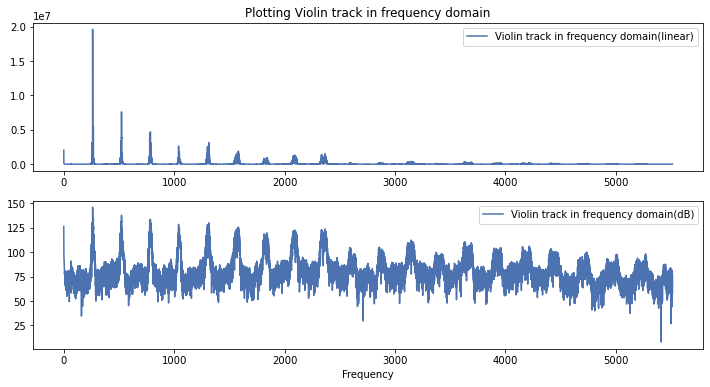

In [102]:
subplotting(violin3, Fs,scale = 'both', name = 'Violin',save = True)
print("Fundamental frequncy of violin3 is:",fundamental_freq(violin3,Fs,threshold = 1e6,Label = None,plot = False) )
IPython.display.Audio(violin3,rate = Fs)

In [33]:
#Question 2
Fs, flute1 = wavfile.read('Experiment-3/flute1.wav')
Fs, flute2 = wavfile.read('Experiment-3/flute2.wav')
Fs, flute4 = wavfile.read('Experiment-3/flute4.wav')



Fundamental frequency of piano3 is: 1048.3772727272728
Fundamental frequency of flute1 is: 1045.2
Fundamental frequency of flute2 is: 262.4710344827586
Fundamental frequency of flute3 is: 793.5040268456376
Fundamental frequency of flute4 is: 524.4


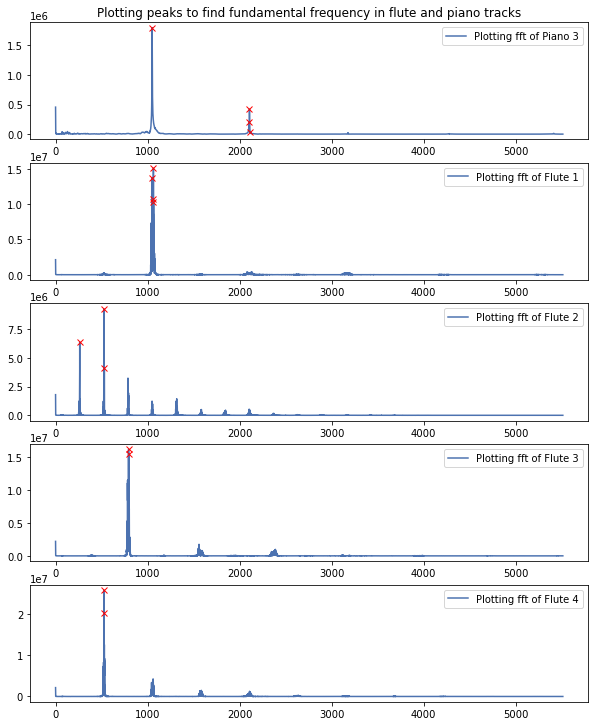

In [106]:
plt.figure(figsize = (10,12.5))
plt.subplot(5,1,1)
plt.title("Plotting peaks to find fundamental frequency in flute and piano tracks")
print("\nFundamental frequency of piano3 is:",fundamental_freq(piano3, Fs,Label = 'Plotting fft of Piano 3',plot = True) )
plt.subplot(5,1,2)
print("Fundamental frequency of flute1 is:",fundamental_freq(flute1, Fs,threshold = 5e6,Label = 'Plotting fft of Flute 1',plot = True) )
plt.subplot(5,1,3)
print("Fundamental frequency of flute2 is:",fundamental_freq(flute2, Fs,threshold = 1e6,Label = 'Plotting fft of Flute 2',plot = True) )
plt.subplot(5,1,4)
print("Fundamental frequency of flute3 is:",fundamental_freq(flute3, Fs,threshold = 5e6,Label = 'Plotting fft of Flute 3',plot = True) )
plt.subplot(5,1,5)
print("Fundamental frequency of flute4 is:",fundamental_freq(flute4, Fs,threshold = 1e7,Label = 'Plotting fft of Flute 4',plot = True) )

plt.savefig('Experiment-3/Results/Fundamental Freq of flute.jpg')


Here, the fundamental frequency of piano3 matches with that of flute1.

Hence $\beta$ = 1

#### Problem 2


Sampling Frequency: 48000


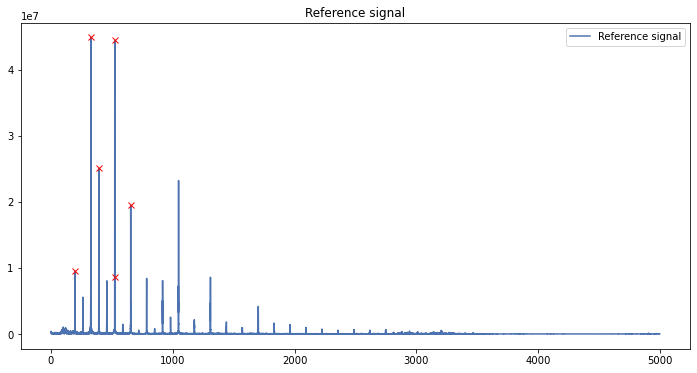

In [135]:
Fs_lock,lock_duo = wavfile.read('Experiment-3/Key.wav')
lock = lock_duo[:,0]

Fs_test1, C_duo = wavfile.read('Experiment-3/C.wav')
Fs_test2, G_duo = wavfile.read('Experiment-3/G.wav')
Fs_test3, E_duo = wavfile.read('Experiment-3/E.wav')
print("Sampling Frequency:",Fs_lock)

test1 = C_duo[:,0]
test2 = G_duo[:,0]
test3 = E_duo[:,0]
   
fundamental_freq(lock,Fs_lock,threshold = 5e6,max_freq = 5000,Label = "Reference signal",plot = True)
plt.title("Reference signal")
plt.savefig("Experiment-3/Results/Reference Signal")
IPython.display.Audio(lock,rate = Fs_lock)

In [136]:
def keylock(possible_key, lock,Fs,plotting = False,sbplot = None):
    
    key_value = fundamental_freq(lock,Fs,threshold = 5e6,max_freq = 5000,Label = "Reference signal",plot = False)
    given_key = fundamental_freq(possible_key,Fs,threshold = 5e6,max_freq=5000,
                                 Label = "Given test case key "+ str(sbplot),plot = plotting)
    print("Fundamental frequency of reference track:",key_value)
    print("Fundamental frequency of given possible key:",given_key)
    
    if (np.abs(key_value - given_key)/key_value) <= 0.05:
        print("ACCESS GRANTED")
    else:
        print("ACCESS DENIED")

Fundamental frequency of reference track: 196.18055555555554
Fundamental frequency of given possible key: 196.18055555555554
ACCESS GRANTED
Fundamental frequency of reference track: 196.18055555555554
Fundamental frequency of given possible key: 293.89312977099235
ACCESS DENIED
Fundamental frequency of reference track: 196.18055555555554
Fundamental frequency of given possible key: 247.1846846846847
ACCESS DENIED


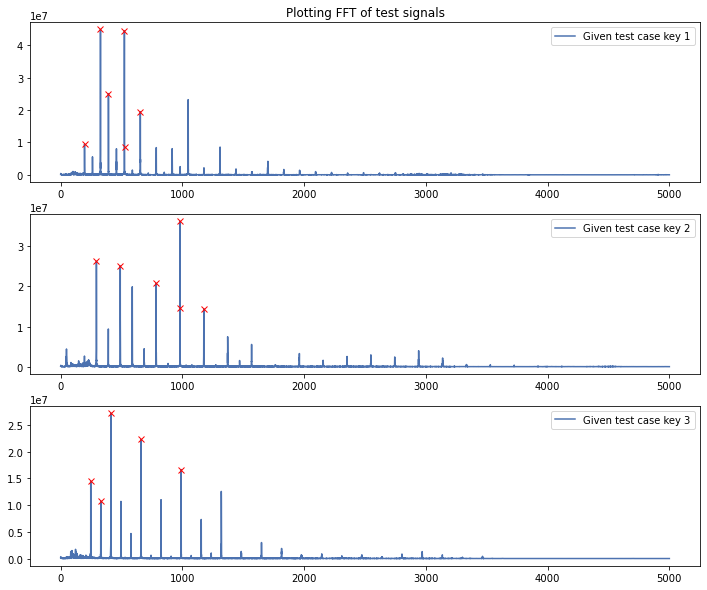

In [137]:
plt.figure(figsize = (12,10))
plt.subplot(3,1,1)
plt.title("Plotting FFT of test signals")
keylock(test1,lock,Fs_lock,plotting = True,sbplot = 1)
plt.subplot(3,1,2)
keylock(test2,lock,Fs_lock,plotting = True,sbplot = 2)
plt.subplot(3,1,3)
keylock(test3,lock,Fs_lock,plotting = True,sbplot = 3)
plt.savefig("Experiment-3/Results/Test cases")

IPython.display.Audio(test1,rate = Fs_test1)

In [109]:
IPython.display.Audio(test2,rate = Fs_test2)

In [110]:
IPython.display.Audio(test3,rate = Fs_test3)

#### Problem 3

In [65]:
Fs_opera, opera = wavfile.read('Experiment-3/Opera.wav')
print("Sampling frequency:",Fs_opera)
IPython.display.Audio(opera, rate = Fs_opera)

Sampling frequency: 44100


In [156]:
def plot_opera(x, Fs,scale,max_freq=None,Label = None):
    
    C = int(len(x) / 2)
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
        
    X = (np.abs(np.fft.fft(x)[0:C]))
    N = Fs * np.arange(0, C) / len(x);
    
    if (scale == 'linear'):
        None;
    elif (scale == 'log'):
        X = 20*np.log10(X)
   

    if Label:
            plt.plot(N, X,label = Label)
            plt.legend(loc = 'upper right')
    else:
        plt.plot(N, X)
        
    return N, X

Fundamental frequency:481.2 Hz 


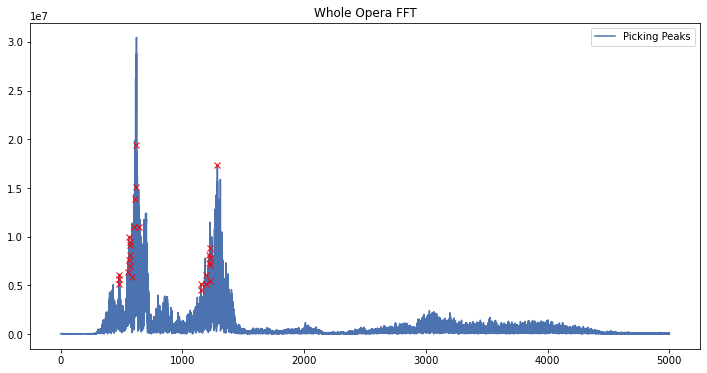

In [182]:
print("Fundamental frequency:{} Hz ".format(fundamental_freq(opera,Fs_opera,
                                                              threshold = 3e6,max_freq = 5000,Label = "Picking Peaks",plot = True)))
plt.title("Whole Opera FFT")
plt.savefig("Experiment-3/Results/Whole Opera")

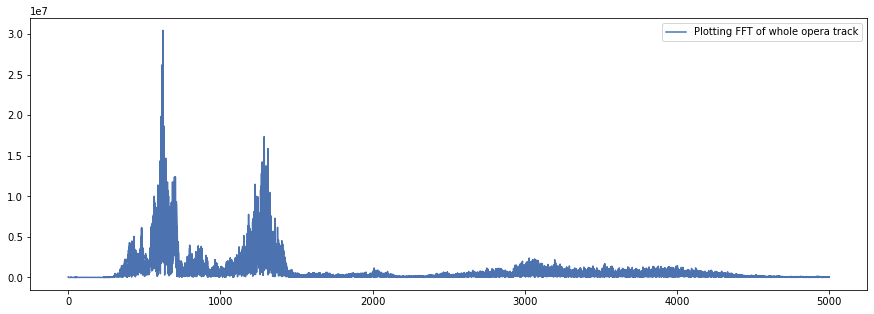

In [175]:
plt.figure(figsize = (15,5))
N_opera, X_opera = plot_opera(opera,Fs_opera,scale = 'linear',max_freq = 5000,Label = 'Plotting FFT of whole opera track')


In [152]:
def plot_opera(subplot, left, right, N, X):
    
    plt.subplot(5, 2, subplot)
    plt.plot(N[left:right], X[left:right],label = "FFT [{}, {}] samples".format(left,right))
    plt.ylabel("Amplitude")
    plt.xlabel("Frequency")
    plt.legend(loc = 'upper right')

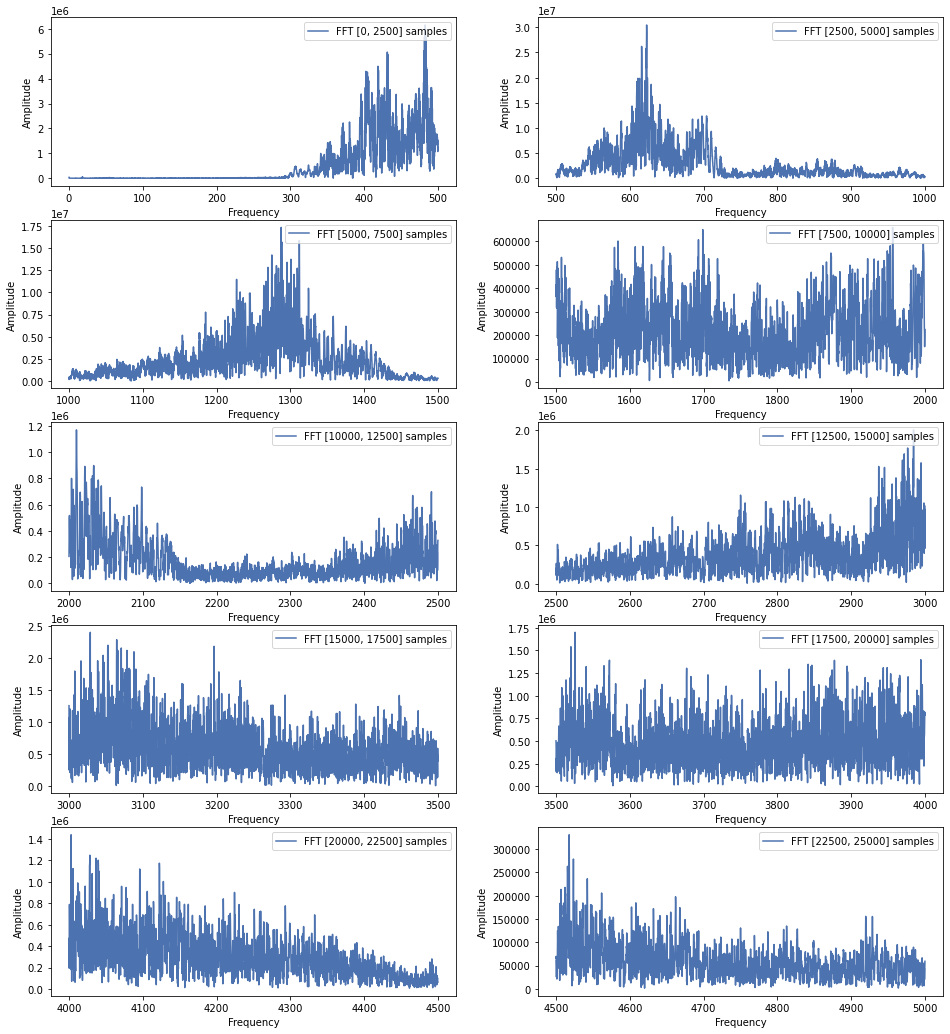

In [154]:
n = int(25000/10)
plt.figure(figsize = (16,18))
plt.title('Plotting part of fft of opera in various windows')
for i in range(1, 11):
    plot_opera(i, (i-1)*n, i*n, N_opera, X_opera)
    
plt.savefig("Experiment-3/Results/Temporal variations")